# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [43]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [44]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,"✅ Trip Verified | Disappointing service, pla..."
1,✅ Trip Verified | A transit visa is required...
2,✅ Trip Verified | I was surprised to receive...
3,"✅ Trip Verified | Flight cancelled, not refu..."
4,"✅ Trip Verified | I had visa issues, and hen..."
5,✅ Trip Verified | Singapore to Heathrow with...
6,✅ Trip Verified | I recently travelled from ...
7,Not Verified | I paid for seats 80 A and B on...
8,"Not Verified | The flight wasn’t that bad, alt..."
9,✅ Trip Verified | I decided to treat myself a...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [45]:
#df.to_csv("data/BA_reviews.csv")

In [46]:
split_dt = df['reviews'].str.split(pat = '|', expand = True)


df[['status', 'reviews_']] = split_dt

In [47]:
df.head(5)

,reviews,status,reviews_
0,"✅ Trip Verified | Disappointing service, pla...",✅ Trip Verified,"Disappointing service, plane interior and t..."
1,✅ Trip Verified | A transit visa is required...,✅ Trip Verified,A transit visa is required for my partner t...
2,✅ Trip Verified | I was surprised to receive...,✅ Trip Verified,I was surprised to receive confirmation pre...
3,"✅ Trip Verified | Flight cancelled, not refu...",✅ Trip Verified,"Flight cancelled, not refunding our money s..."
4,"✅ Trip Verified | I had visa issues, and hen...",✅ Trip Verified,"I had visa issues, and hence, was debarred ..."


In [48]:
ba_df=df.drop('reviews',axis=1,inplace=False)

In [49]:
ba_df.head(6)

,status,reviews_
0,✅ Trip Verified,"Disappointing service, plane interior and t..."
1,✅ Trip Verified,A transit visa is required for my partner t...
2,✅ Trip Verified,I was surprised to receive confirmation pre...
3,✅ Trip Verified,"Flight cancelled, not refunding our money s..."
4,✅ Trip Verified,"I had visa issues, and hence, was debarred ..."
5,✅ Trip Verified,Singapore to Heathrow with BA. Two choices ...


In [50]:
ba_df.shape

(1000, 2)

We want to analyse the trips that are only verified, so we need to remove rows that do not contain verified trips(Not Verified)


In [51]:
ba_rv = ba_df[~ba_df['status'].str.contains('Not Verified')]

In [52]:
ba_rv.head()

,status,reviews_
0,✅ Trip Verified,"Disappointing service, plane interior and t..."
1,✅ Trip Verified,A transit visa is required for my partner t...
2,✅ Trip Verified,I was surprised to receive confirmation pre...
3,✅ Trip Verified,"Flight cancelled, not refunding our money s..."
4,✅ Trip Verified,"I had visa issues, and hence, was debarred ..."


In [53]:
ba_rv.shape

(738, 2)

so we were able to filter and drop rows that are not verified. This that means 262 reviews were not verifed.

-------------------------------------------------------------------------------------------------------------------------------------------------------

Now we want to analyze the customer reviews and carry out sentiment analysis to know reviews that are Positive and Negative

To do this, we would be using a pre-trained sentiment analyzer, such as the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool built from the NLTK library.

In [54]:
#import nltk 
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [55]:
# Download VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

After loading the necessary dependencies, we need to create an object of the SentimentIntensityAnalyzer model that will be used for predicting the sentiments of text.

In [56]:
# Initialize VADER sentiment analyzer
model = SentimentIntensityAnalyzer()

 let us use the model object to predict the sentiment the reviews using the polarity_scores() method. Then we will get the compound score returned by the model.

In [57]:
# Analyze sentiment
ba_rv['sentiment'] = ba_rv['reviews_'].apply(lambda x: model.polarity_scores(x)['compound'])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11528\1798494349.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
ba_rv.head()

,status,reviews_,sentiment
0,✅ Trip Verified,"Disappointing service, plane interior and t...",-0.9848
1,✅ Trip Verified,A transit visa is required for my partner t...,0.0258
2,✅ Trip Verified,I was surprised to receive confirmation pre...,0.9201
3,✅ Trip Verified,"Flight cancelled, not refunding our money s...",-0.4939
4,✅ Trip Verified,"I had visa issues, and hence, was debarred ...",-0.9010


 We will treat a compound score with sentiment less than or equal to -0.05 as negative sentiment, a score greater than or equal to 0.05 as positive sentiment, and the score in between as neutral sentiment.

The result from the VADER model is a set of four different numbers that belong to classes such as negative, neutral, positive, and compound. The break up of the score for these classes is as follows:

Negative: It depicts the negative sentiment and its value ranges from 0 to 1.

Neutral: It depicts the neutral sentiment and its value ranges from 0 to 1.

Positive: It depicts the positive sentiment and its value ranges from 0 to 1.

Compound: It provides us the overall sentiment score and its value ranges from -1 to 1, -1 being the strong negative sentiment and 1 being the strong positive sentiment.

---------------------------------------------------------------------------------------------------------------------------------------------------------------

DATA VISUALIZATION

We would be using the plotly to visualize the sentiment score


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

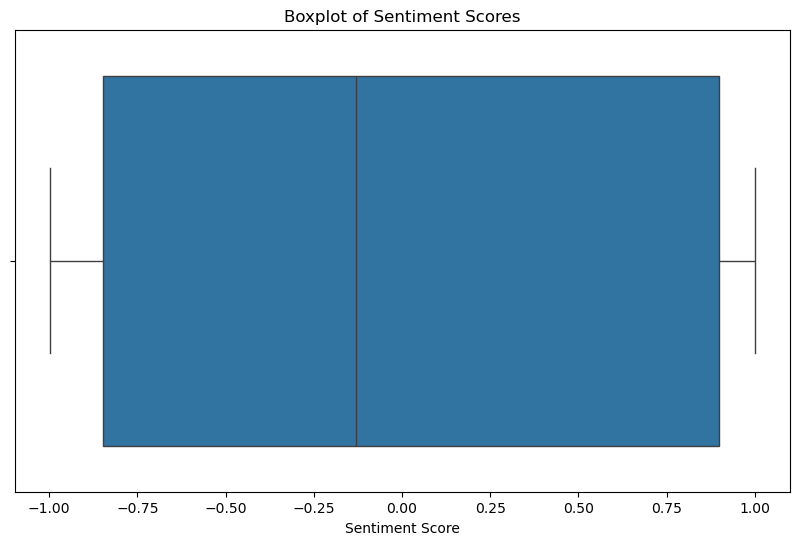

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=ba_rv['sentiment'])
plt.title('Boxplot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.show()

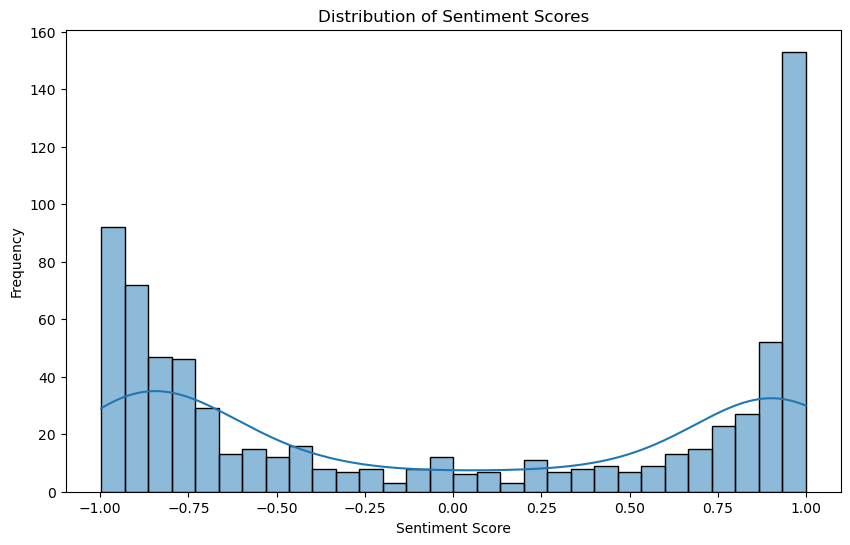

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(ba_rv['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
ba_rv['sentiment_label'] = ba_rv['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [68]:
ba_rv.head()

,status,reviews_,sentiment,sentiment_label
0,✅ Trip Verified,"Disappointing service, plane interior and t...",-0.9848,negative
1,✅ Trip Verified,A transit visa is required for my partner t...,0.0258,positive
2,✅ Trip Verified,I was surprised to receive confirmation pre...,0.9201,positive
3,✅ Trip Verified,"Flight cancelled, not refunding our money s...",-0.4939,negative
4,✅ Trip Verified,"I had visa issues, and hence, was debarred ...",-0.9010,negative


In [70]:
no_pos_rev=ba_rv['sentiment_label'].value_counts()['positive']
no_pos_rev

350

In [72]:
no_neg_rev=ba_rv['sentiment_label'].value_counts()['negative']
no_neg_rev

382

In [73]:
no_neu_rev=ba_rv['sentiment_label'].value_counts()['neutral']
no_neu_rev

6